In [13]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mice_study_combined = pd.merge(study_results, mouse_metadata, on = "Mouse ID", how="left")

# Display the data table for preview
mice_study_combined

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [3]:
# Checking the number of mice.
total_mice = mice_study_combined["Mouse ID"].nunique()
print(total_mice)

249


In [4]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicates = mice_study_combined.duplicated(subset= ["Mouse ID", "Timepoint"],keep="last")

dups = mice_study_combined.loc[duplicates,"Mouse ID"].unique()
dups


array(['g989'], dtype=object)

In [5]:
# Optional: Get all the data for the duplicate mouse ID.
duplicates_info = mice_study_combined.loc[mice_study_combined["Mouse ID"]==dups[0]]

duplicates_info

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mice_study_df = mice_study_combined.loc[mice_study_combined["Mouse ID"]!=dups[0]]
mice_study_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [7]:
# Checking the number of mice in the clean DataFrame.
total_mice_2 = mice_study_df["Mouse ID"].nunique()
total_mice_2

248

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
mean = mice_study_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
median = mice_study_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
var = mice_study_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
std = mice_study_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
sem = mice_study_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

# Assemble the resulting series into a single summary DataFrame.
summary_df = pd.DataFrame({"Mean Tumor Volume":mean,"Median Tumor Volume":median,
                           "Tumor Volume Variance":var,"Tumor Volume Std. Dev.":std,
                           "Tumor Volume Std. Err.":sem})
summary_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [12]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
# Using the aggregation method, produce the same summary statistics in a single line
info = mice_study_df[["Drug Regimen","Tumor Volume (mm3)"]].groupby("Drug Regimen").agg(['mean','median','var','std','sem'])
info

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

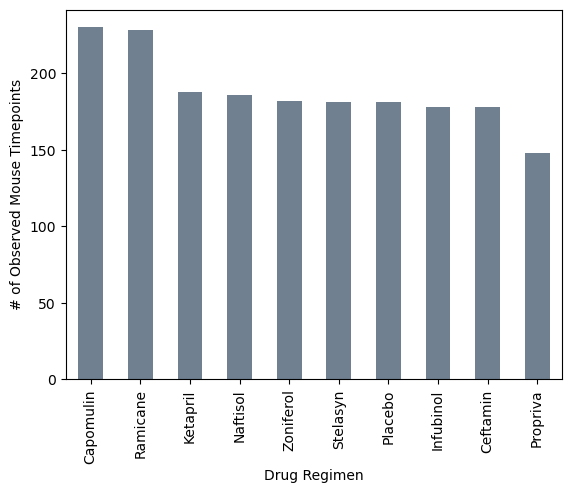

<Figure size 640x480 with 0 Axes>

In [30]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drug_count =  mice_study_df["Drug Regimen"].value_counts()
drug_count.plot.bar(color="slategrey")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.show()

plt.savefig('../Pymaceuticals/Images/pandas_bar.png', bbox_inches='tight')

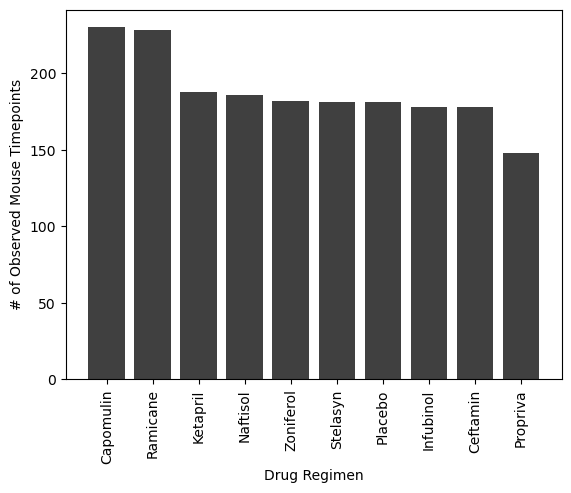

<Figure size 640x480 with 0 Axes>

In [31]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_axis = drug_count.index.values
y_axis = drug_count.values

plt.bar(x_axis, y_axis, color='black', alpha=0.75, align='center')
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.xticks(rotation="vertical")

plt.show()

plt.savefig('../Pymaceuticals/Images/pyplot_bar.png', bbox_inches='tight')

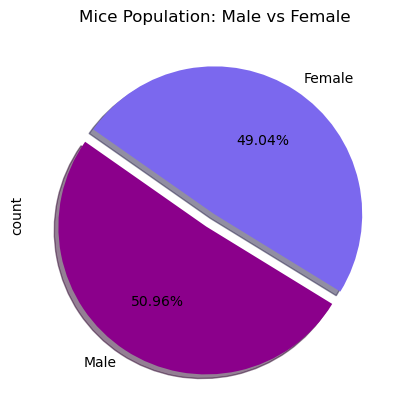

<Figure size 640x480 with 0 Axes>

In [32]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study
# Get the unique mice with their gender
mice_gender = mice_study_df['Sex'].value_counts()

label = ["Male","Female"]
color = ["darkmagenta","mediumslateblue"]
ex = [0.1,0]

# Make the pie chart
plt.title("Mice Population: Male vs Female")
plt.ylabel("count")
mice_gender.plot.pie(labels = label, colors = color, explode = ex, shadow = True, startangle=145, autopct= "%1.2f%%")
plt.show()
plt.savefig('../Pymaceuticals/Images/pandas_pie_plot.png', bbox_inches='tight')

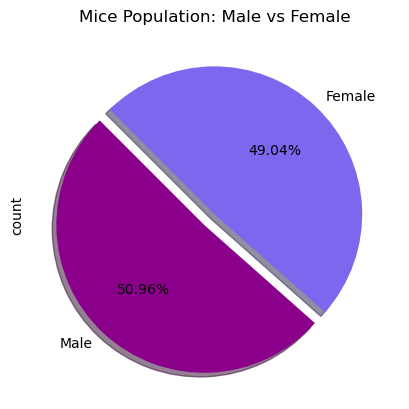

<Figure size 640x480 with 0 Axes>

In [33]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study
plt.pie(mice_gender, explode=ex, colors = color, shadow=True, labels= label, startangle=135,autopct="%1.2f%%")

# Get the unique mice with their gender
plt.title("Mice Population: Male vs Female")
plt.ylabel("count")
plt.show()
# Make the pie chart
plt.savefig('../Pymaceuticals/Images/pyplot_pie_plot.png', bbox_inches='tight')

In [28]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin
capomulin = mice_study_df.loc[mice_study_df["Drug Regimen"] == "Capomulin",:]
ramicane = mice_study_df.loc[mice_study_df["Drug Regimen"] == "Ramicane",:]
infubinol = mice_study_df.loc[mice_study_df["Drug Regimen"] == "Infubinol",:]
ceftamin = mice_study_df.loc[mice_study_df["Drug Regimen"] == "Ceftamin",:]
# Start by getting the last (greatest) timepoint for each mouse
capomulin_max = capomulin.groupby('Mouse ID').max()['Timepoint']
ramicane_max = ramicane.groupby('Mouse ID').max()['Timepoint']
infubinol_max = infubinol.groupby('Mouse ID').max()['Timepoint']
ceftamin_max = ceftamin.groupby('Mouse ID').max()['Timepoint']

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
capomulin_merge = pd.merge(capomulin_max, mice_study_df, on=("Mouse ID","Timepoint"),how="left")
ramicane_merge = pd.merge(ramicane_max, mice_study_df, on=("Mouse ID","Timepoint"),how="left")
infubinol_merge = pd.merge(infubinol_max, mice_study_df, on=("Mouse ID","Timepoint"),how="left")
ceftamin_merge = pd.merge(ceftamin_max, mice_study_df, on=("Mouse ID","Timepoint"),how="left")

merged_data = pd.concat([capomulin_merge, ramicane_merge, infubinol_merge, ceftamin_merge])


In [29]:
# Put treatments into a list for for loop (and later for plot labels)
regimen_lst = ["Capomulin", "Ramicane","Infubinol","Ceftamin"]

# Create list to fill with tumor vol data (for plotting)
tumor_vol_lst = [capomulin_merge["Tumor Volume (mm3)"], 
                     ramicane_merge["Tumor Volume (mm3)"], 
                     infubinol_merge["Tumor Volume (mm3)"],
                     ceftamin_merge["Tumor Volume (mm3)"]
]

# Calculate the IQR and quantitatively determine if there are any potential outliers.
for i in range(len(regimen_lst)):

    tumor = tumor_vol_lst[i]

    # Locate the rows which contain mice on each drug and get the tumor volumes
    quartiles = tumor.quantile([0.25, 0.5, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = round(upperq - lowerq, 4)
    median = tumor.median()
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)


    # Determine outliers using upper and lower bounds
    outlier_results = round(tumor[(tumor < lower_bound) | (tumor > upper_bound)], 4)
    print(f"  {regimen_lst[i]}'s potential outlier: {outlier_results}")


  Capomulin's potential outlier: Series([], Name: Tumor Volume (mm3), dtype: float64)
  Ramicane's potential outlier: Series([], Name: Tumor Volume (mm3), dtype: float64)
  Infubinol's potential outlier: 5    36.3213
Name: Tumor Volume (mm3), dtype: float64
  Ceftamin's potential outlier: Series([], Name: Tumor Volume (mm3), dtype: float64)


/var/folders/zd/q6qh7xnd63q_4jpd7s3jwkt00000gn/T/ipykernel_45696/3697093202.py:4: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes.boxplot(tumor_vol_lst, labels=regimen_lst,


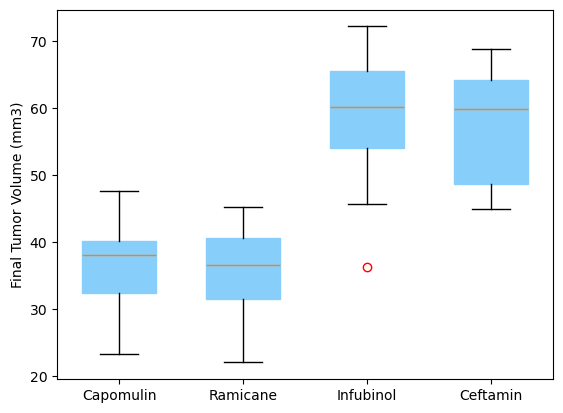

<Figure size 640x480 with 0 Axes>

In [42]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
fig1, axes = plt.subplots()
axes.set_ylabel('Final Tumor Volume (mm3)')
axes.boxplot(tumor_vol_lst, labels=regimen_lst, 
            widths = 0.6, patch_artist = True, vert=True, 
            boxprops=dict(facecolor="lightskyblue", color="lightskyblue"),
            flierprops=dict(color="orchid", markeredgecolor="r"))

plt.show()
plt.savefig('../Pymaceuticals/Images/box_plot.png', bbox_inches='tight')

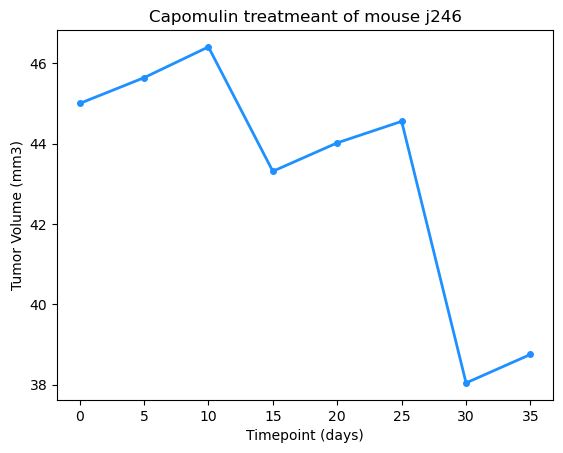

<Figure size 640x480 with 0 Axes>

In [57]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_mouse = capomulin["Mouse ID"].iloc[1]
capomulin_line_plot = capomulin.loc[capomulin["Mouse ID"] == capomulin_mouse,:]
x_axis = capomulin_line_plot["Timepoint"]
yaxis = capomulin_line_plot["Tumor Volume (mm3)"]
fig1, ax1 = plt.subplots()
plt.title(f'Capomulin treatmeant of mouse {capomulin_mouse}')
plt.plot(x_axis, yaxis,linewidth=2, markersize=4,marker="o",color="dodgerblue")
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')

plt.show()
plt.savefig('../Pymaceuticals/Images/line_plot.png', bbox_inches='tight')

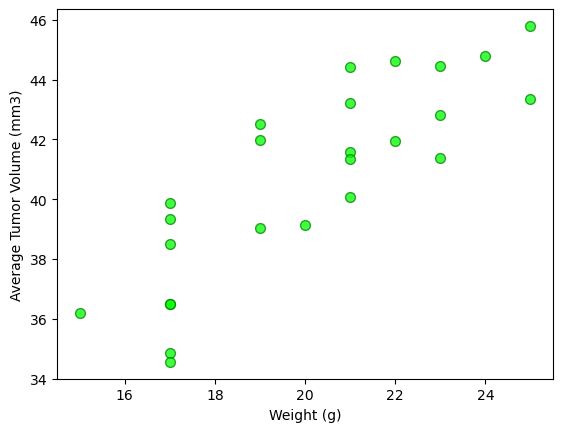

<Figure size 640x480 with 0 Axes>

In [62]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capo_vol_mean = capomulin.groupby('Mouse ID')[['Weight (g)', 'Tumor Volume (mm3)']].mean()
fig1, axes = plt.subplots()
axes.scatter(capo_vol_mean['Weight (g)'], capo_vol_mean['Tumor Volume (mm3)'],alpha = 0.75, color="g",facecolor="lime" ,s=50)
axes.set_xlabel('Weight (g)')
axes.set_ylabel('Average Tumor Volume (mm3)')

plt.show()
plt.savefig('../Pymaceuticals/Images/scatter_plot.png', bbox_inches='tight')

The correlation between mouse weight and the average tumor volume is: 0.8419


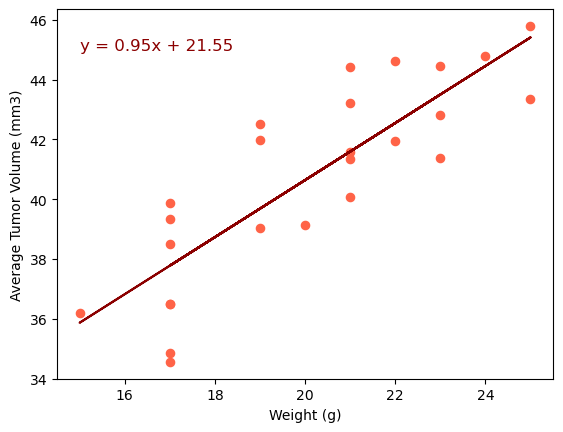

<Figure size 640x480 with 0 Axes>

In [74]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
correlation = st.pearsonr(capo_vol_mean['Weight (g)'],capo_vol_mean['Tumor Volume (mm3)'])
x_axis = capo_vol_mean['Weight (g)']
y_axis = capo_vol_mean['Tumor Volume (mm3)']

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The correlation between mouse weight and the average tumor volume is: {round(correlation[0],4)}")

fig1, axes = plt.subplots()
plt.scatter(x_axis,y_axis,s=35, color="tomato")
plt.plot(x_axis,regress_values,color="darkred")
plt.xlabel('Weight (g)',fontsize =10)
plt.ylabel('Average Tumor Volume (mm3)',fontsize =10)
axes.annotate(line_eq, xy=(15, 45), fontsize=12,color="darkred")

plt.show()
plt.savefig('../Pymaceuticals/Images/regression_scatter_plot.png', bbox_inches='tight')
